In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cp "/content/drive/My Drive/data/SolarPrediction.csv" "SolarPrediction.csv"

In [4]:
data_train = pd.read_csv('SolarPrediction.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
data_train

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [6]:
data_train["Data"] = pd.to_datetime(data_train["Data"]).dt.strftime('%Y-%m-%d')
print(data_train)

         UNIXTime        Data      Time  ...  Speed  TimeSunRise  TimeSunSet
0      1475229326  2016-09-29  23:55:26  ...   5.62     06:13:00    18:13:00
1      1475229023  2016-09-29  23:50:23  ...   3.37     06:13:00    18:13:00
2      1475228726  2016-09-29  23:45:26  ...   3.37     06:13:00    18:13:00
3      1475228421  2016-09-29  23:40:21  ...   3.37     06:13:00    18:13:00
4      1475228124  2016-09-29  23:35:24  ...   5.62     06:13:00    18:13:00
...           ...         ...       ...  ...    ...          ...         ...
32681  1480587604  2016-12-01  00:20:04  ...   6.75     06:41:00    17:42:00
32682  1480587301  2016-12-01  00:15:01  ...   6.75     06:41:00    17:42:00
32683  1480587001  2016-12-01  00:10:01  ...   9.00     06:41:00    17:42:00
32684  1480586702  2016-12-01  00:05:02  ...   7.87     06:41:00    17:42:00
32685  1480586402  2016-12-01  00:00:02  ...   3.37     06:41:00    17:42:00

[32686 rows x 11 columns]


In [7]:
data_train['Date/Time'] = data_train['Data'].map(str) + ' ' + data_train['Time'].map(str)
print (data_train)

         UNIXTime        Data  ... TimeSunSet            Date/Time
0      1475229326  2016-09-29  ...   18:13:00  2016-09-29 23:55:26
1      1475229023  2016-09-29  ...   18:13:00  2016-09-29 23:50:23
2      1475228726  2016-09-29  ...   18:13:00  2016-09-29 23:45:26
3      1475228421  2016-09-29  ...   18:13:00  2016-09-29 23:40:21
4      1475228124  2016-09-29  ...   18:13:00  2016-09-29 23:35:24
...           ...         ...  ...        ...                  ...
32681  1480587604  2016-12-01  ...   17:42:00  2016-12-01 00:20:04
32682  1480587301  2016-12-01  ...   17:42:00  2016-12-01 00:15:01
32683  1480587001  2016-12-01  ...   17:42:00  2016-12-01 00:10:01
32684  1480586702  2016-12-01  ...   17:42:00  2016-12-01 00:05:02
32685  1480586402  2016-12-01  ...   17:42:00  2016-12-01 00:00:02

[32686 rows x 12 columns]


In [8]:
data_train = data_train.drop(columns=['UNIXTime', 'Data', 'Time', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet'])

In [9]:
data_train

,Radiation,Date/Time
0,1.21,2016-09-29 23:55:26
1,1.21,2016-09-29 23:50:23
2,1.23,2016-09-29 23:45:26
3,1.21,2016-09-29 23:40:21
4,1.17,2016-09-29 23:35:24
...,...,...
32681,1.22,2016-12-01 00:20:04
32682,1.17,2016-12-01 00:15:01
32683,1.20,2016-12-01 00:10:01
32684,1.23,2016-12-01 00:05:02


In [18]:
data_train["Date/Time"] = pd.to_datetime(data_train["Date/Time"])
time_mask = (data_train['Date/Time'].dt.month >= 9) & \
            (data_train['Date/Time'].dt.month <= 10)

In [19]:
data_train[time_mask].isnull().sum()

Radiation    0
Date/Time    0
dtype: int64

In [20]:
data_train[time_mask]

,Radiation,Date/Time
0,1.21,2016-09-29 23:55:26
1,1.21,2016-09-29 23:50:23
2,1.23,2016-09-29 23:45:26
3,1.21,2016-09-29 23:40:21
4,1.17,2016-09-29 23:35:24
...,...,...
16233,1.25,2016-10-01 00:40:24
16234,1.24,2016-10-01 00:35:22
16235,1.27,2016-10-01 00:30:18
16236,1.29,2016-10-01 00:20:20


In [21]:
data_train[time_mask][data_train[time_mask]['Radiation']==data_train[time_mask]['Radiation'].min()]

,Radiation,Date/Time
9137,1.13,2016-10-26 00:20:18
10023,1.13,2016-10-22 22:05:20


In [14]:
data_train[time_mask][data_train[time_mask]['Radiation']==data_train[time_mask]['Radiation'].max()]

,Radiation,Date/Time
6465,1601.26,2016-09-04 12:15:04


In [22]:
datetime = data_train[time_mask]['Date/Time'].values
radiation  = data_train[time_mask]['Radiation'].values

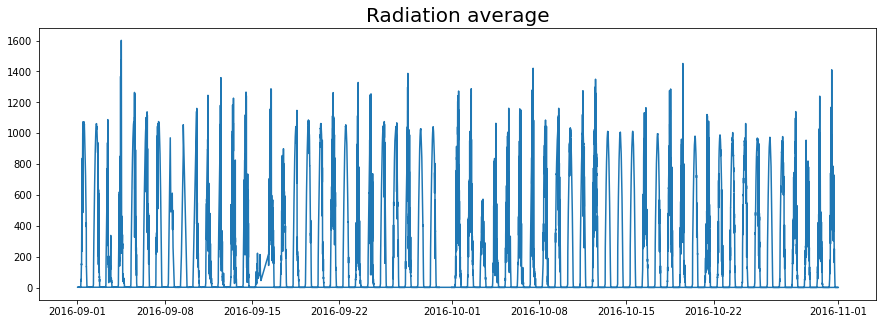

In [23]:
plt.figure(figsize=(15,5))
plt.plot(datetime, radiation)
plt.title('Radiation average',
          fontsize=20);

In [24]:
split_time = int(len(datetime)*0.8)
time_train = datetime[:split_time]
x_train = radiation[:split_time]
time_valid = datetime[split_time:]
x_valid = radiation[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [25]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [26]:
def model_forecast(model, temp, window_size):
    ds = tf.data.Dataset.from_tensor_slices(temp)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(-1)
    forecast = model.predict(ds)
    return forecast

In [27]:
train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(LSTM(60, return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(60)),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<160):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [30]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-05, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500, callbacks=[callbacks])

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

65/65 [==============================] - 26s 407ms/step - loss: 236.3662 - mae: 236.8660
Epoch 2/500
65/65 [==============================] - 27s 413ms/step - loss: 236.3450 - mae: 236.8448
Epoch 3/500
65/65 [==============================] - 35s 532ms/step - loss: 236.3212 - mae: 236.8209
Epoch 4/500
65/65 [==============================] - 27s 415ms/step - loss: 236.2908 - mae: 236.7903
Epoch 5/500
65/65 [==============================] - 27s 416ms/step - loss: 236.2592 - mae: 236.7583
Epo

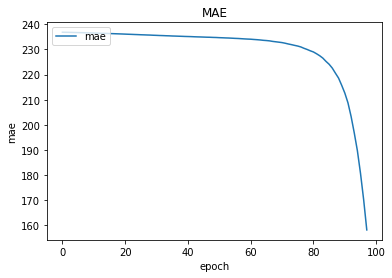

In [31]:
plt.plot(history.history['mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['mae'], loc='upper left')
plt.show()